## Figure 3d: Heatmap of drug dosage-associated features

This script prints Figure 3d: Drug-feature relationships confirmed or uniquely revealed by dosage analysis. 

Heatmaps show serum metabolome and gut microbiome features confirmed by dosage analysis (replicable in a post-hoc test at Spearman P < 0.05 excluding wholly unmedicated subjects to verify effect is truly dosage-dependent) in addition to individual drug intake, or which can be demonstrated only when considering dosage of the medication as given to each subject.

Features are separated by host and microbiome, and defined as potential drug effects (discordant with the disease effect) or severity markers (concordant with the disease effect). 

ACE: angiotensin converting enzyme; DPPIV: dipeptidyl peptidase 4; GLP-1: Glucagon-like peptide-1; PPI: proton pump inhibitor; SGLT2: sodium/glucose co-transporter 2.

Required file in the _input_data_ folder:

- Supplementary_Table_13_2019-09-13434.xlsx

Figure is based on the data from Supplementary Table 13. 

In [1]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read dosage-confirmed associations

In [2]:
# read drug dosage tables
fileFolder = './input_data/'
fileName = 'Supplementary_Table_13_2019-09-13434.xlsx'
sheetName = 'Dosage-confirmed'

In [3]:
dosageEffects_df = pd.read_excel(fileFolder + fileName,
                                 sheet_name = sheetName)

In [4]:
# Get feature spaces and separately calculate opposite and same congruence 
# (direction of effect for drug and disease)
feature_space = list(set(dosageEffects_df['Feature space']))

feature_same = []
feature_opposite = []
for curfeat in feature_space:
    curdf = dosageEffects_df[(dosageEffects_df['Feature space']==curfeat) &
                            (dosageEffects_df['Congruence']=='Same')]
    feature_same.append(np.shape(curdf)[0])
    curdf = dosageEffects_df[(dosageEffects_df['Feature space']==curfeat) &
                            (dosageEffects_df['Congruence']=='Opposite')]
    feature_opposite.append(np.shape(curdf)[0])

sortidx = np.argsort([item.lower() for item in feature_space])
feature_space = [feature_space[i] for i in sortidx]
feature_same = [feature_same[i] for i in sortidx]
feature_opposite = [feature_opposite[i] for i in sortidx]

In [5]:
# get unique list of drugs
drugnames = list(set(dosageEffects_df['Effector']))

In [6]:
# get congruence
congruence = [item for item in list(set(dosageEffects_df['Congruence']))
              if type(item)==str]

In [7]:
# for each feature space, separate by congruence
feature_congruence = [x+'_'+y for y in congruence for x in feature_space ]
# create dataframe to store number of features confirmed by dosage
drugdosage_effect_df = pd.DataFrame(0, index = drugnames, 
                                   columns = feature_congruence)

In [8]:
# calculate number of features confirmed by dosage per drug
for curdrug in drugnames:
    for curfeat in feature_space:
        for congr in congruence:
            curdf = dosageEffects_df[
                (dosageEffects_df['Effector']==curdrug) &
                (dosageEffects_df['Feature space']==curfeat) &
                (dosageEffects_df['Congruence']==congr)]
            # calculate each feature once
            #curdf = curdf[['Feature space', 'Feature display name']]
            curdf = curdf['Feature ID']
            curdf = curdf.drop_duplicates()
            curval = np.shape(curdf)[0] 
            if congr=='Opposite':
                curval = -curval
            drugdosage_effect_df.loc[curdrug, curfeat+'_'+congr] = curval

In [9]:
#prepare data to plot
plotdata_confirmed = drugdosage_effect_df.copy()

In [10]:
# sort by number
plotdata_confirmed['sum'] = abs(plotdata_confirmed).sum(axis=1)
plotdata_confirmed = plotdata_confirmed.sort_values(by='sum', ascending=False)
plotdata_confirmed = plotdata_confirmed.drop(columns='sum')

In [11]:
plotdata_confirmed = plotdata_confirmed.fillna(0)

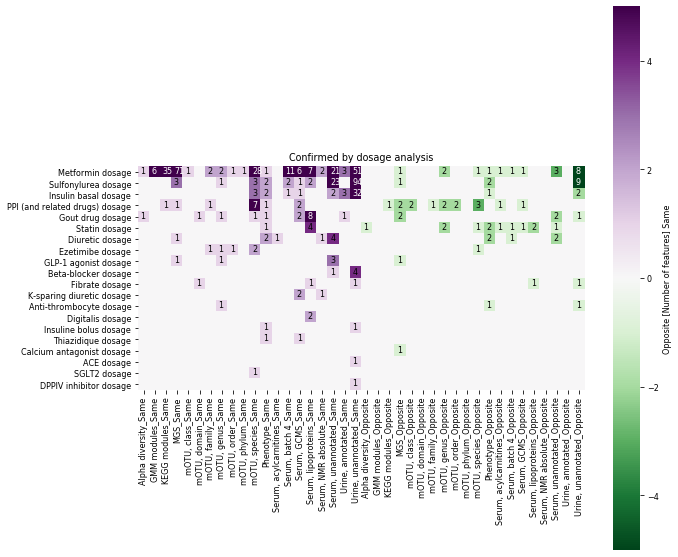

In [12]:
plotcmax = 5
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 8})
g = sns.heatmap(plotdata_confirmed,yticklabels=1, cmap = 'PRGn_r',#'vlag',# annot=True,
                cbar_kws={'label': 'Opposite [Number of features] Same'},
                vmin=-plotcmax, vmax=plotcmax)
fig = g.get_figure()
ax = plt.gca()
ax.set_aspect('equal')

for i in range(plotdata_confirmed.shape[0]):
    for j in range(plotdata_confirmed.shape[1]):
        if abs(plotdata_confirmed.iloc[i,j])>plotcmax:
            textcol = 'white'
        else:
            textcol = 'black'        
        if abs(plotdata_confirmed.iloc[i,j])>0:
                plt.text(j+0.2,i+0.6,abs(plotdata_confirmed.iloc[i,j]), color=textcol)
plt.rcParams['svg.fonttype'] = 'none'
plt.title('Confirmed by dosage analysis')

filename = "Fig3d_heatmap_dosage_confirmed"
# fig.savefig(fileFolder + filename + '.png',
#             format='png',
#             bbox_inches='tight')
# fig.savefig(fileFolder + filename + '.svg',
#             format='svg',
#             bbox_inches='tight')

### Read dosage-unique associations

In [13]:
# select Dosage-unique sheet from the table
sheetName = 'Dosage-unique'
dosageEffects_df = pd.read_excel(fileFolder + fileName,
                                 sheet_name = sheetName) 

Select features, feature spaces, drugs and congruence in analogy with the plot above. 

In [14]:
feature_space = list(set(dosageEffects_df['Feature space']))

feature_same = []
feature_opposite = []
for curfeat in feature_space:
    curdf = dosageEffects_df[(dosageEffects_df['Feature space']==curfeat) &
                            (dosageEffects_df['Congruence']=='Same')]
    feature_same.append(np.shape(curdf)[0])
    curdf = dosageEffects_df[(dosageEffects_df['Feature space']==curfeat) &
                            (dosageEffects_df['Congruence']=='Opposite')]
    feature_opposite.append(np.shape(curdf)[0])

sortidx = np.argsort([item.lower() for item in feature_space])
feature_space = [feature_space[i] for i in sortidx]
feature_same = [feature_same[i] for i in sortidx]
feature_opposite = [feature_opposite[i] for i in sortidx]

In [15]:
drugnames = list(set(dosageEffects_df['Effector']))

In [16]:
congruence = [item for item in list(set(dosageEffects_df['Congruence']))
              if type(item)==str]

In [17]:
feature_congruence = [x+'_'+y for y in congruence for x in feature_space ]
drugdosage_effect_df = pd.DataFrame(0, index = drugnames, 
                                   columns = feature_congruence)

Calculate number of feature associations uniquely identified with dosage analysis

In [18]:
for curdrug in drugnames:
    for curfeat in feature_space:
        for congr in congruence:
            curdf = dosageEffects_df[
                (dosageEffects_df['Effector']==curdrug) &
                (dosageEffects_df['Feature space']==curfeat) &
                (dosageEffects_df['Congruence']==congr)]
            # calculate each feature once
            #curdf = curdf[['Feature space', 'Feature display name']]
            curdf = curdf['Feature ID']
            curdf = curdf.drop_duplicates()
            curval = np.shape(curdf)[0] 
            if congr=='Opposite':
                curval = -curval
            drugdosage_effect_df.loc[curdrug, curfeat+'_'+congr] = curval

Prepare data to plot

In [19]:
plotdata_unique = drugdosage_effect_df.copy()

In [20]:
# append empty rows to only dosage
plotdata_add = plotdata_confirmed.loc[list(set(plotdata_confirmed.index).
                                           difference(plotdata_unique.index))]
plotdata_unique = pd.concat([plotdata_unique, plotdata_add])

In [21]:
plotdata_unique = plotdata_unique.loc[plotdata_confirmed.index,plotdata_confirmed.columns]
plotdata_unique = plotdata_unique.fillna(0)

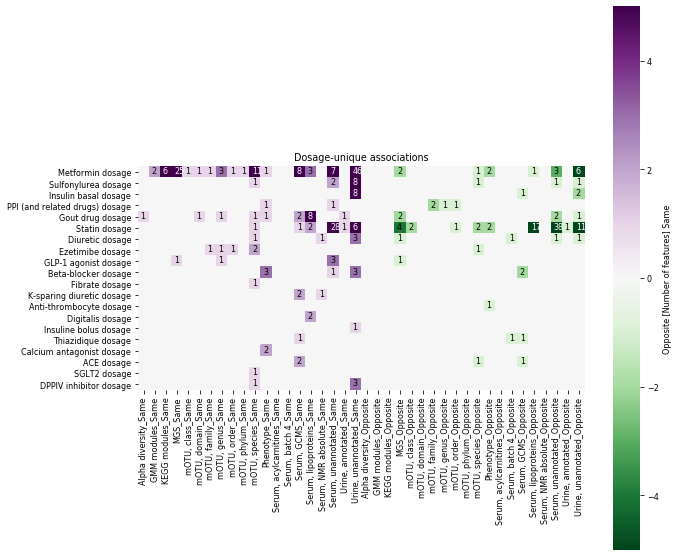

In [22]:
plotcmax = 5
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 8})
g = sns.heatmap(plotdata_unique,yticklabels=1, cmap = 'PRGn_r',#'vlag',# annot=True,
                cbar_kws={'label': 'Opposite [Number of features] Same'},
                vmin=-plotcmax, vmax=plotcmax)
fig = g.get_figure()
ax = plt.gca()
ax.set_aspect('equal')

for i in range(plotdata_unique.shape[0]):
    for j in range(plotdata_unique.shape[1]):
        if abs(plotdata_unique.iloc[i,j])>plotcmax:
            textcol = 'white'
        else:
            textcol = 'black'        
        if abs(plotdata_unique.iloc[i,j])>0:
                plt.text(j+0.2,i+0.6,abs(plotdata_unique.iloc[i,j]), color=textcol)

plt.title('Dosage-unique associations')
                
plt.rcParams['svg.fonttype'] = 'none'
filename = "Fig3d_heatmap_dosage_unique"
# fig.savefig(fileFolder + filename + '.png',
#             format='png',
#             bbox_inches='tight')
# fig.savefig(fileFolder + filename + '.svg',
#             format='svg',
#             bbox_inches='tight')